In [187]:
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Multitple files Using map: Not working
PATH='C:\\Users\\habsa\\Documents\\DataAnalyticsDataSets\\SpringBoardProjects\\FannieMae Project Files\\Acqn_2009_2016'
Acqn_2009_2016=pd.concat(map(pd.read_csv(sep='|',header=None),glob.glob(os.path.join(PATH,"*.txt"))))

In [188]:
Acqn_2016Q4=pd.read_csv('C:\\Users\\habsa\\Documents\\DataAnalyticsDataSets\\SpringBoardProjects\\FannieMae Project Files\\Acquisition_All\\Acquisition_2016Q4.txt',sep='|',header=None)

In [176]:
Acqsn_new_columns=["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE"
                          ,"FRST_DTE", "OLTV", "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP"
                          ,"NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C","MORT.INS.Type","Reloc_Mort_Ind"]

In [177]:
Acqn_2016Q4.columns=Acqsn_new_columns

In [77]:
#Cleaning Data- Removing obvious unwanted variables-"ORIG_CHN","ORIG_DTE","FRST_DTE","STATE","MI_PCT","STATE","ZIP_3"
Acqn_2016Q4_cleaned=Acqn_2016Q4[["LOAN_ID", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM",  "OLTV", "OCLTV", "NUM_BO", "DTI", "CSCORE_B",
                                 "FTHB_FLG", "PURPOSE","PROP_TYP","NUM_UNIT", "OCC_STAT","CSCORE_C"]]


In [211]:
#Setting up Index
Acqn_2016Q4_cleaned_indexed=Acqn_2016Q4_cleaned.set_index('LOAN_ID')

In [212]:
# #CONVERTING Variables to Categorical variables
# Acqn_2016Q4_cleaned_indexed.NUM_BO=pd.Categorical(Acqn_2016Q4_cleaned_indexed.NUM_BO)
# Acqn_2016Q4_cleaned_indexed.FTHB_FLG=pd.Categorical(Acqn_2016Q4_cleaned_indexed.FTHB_FLG)
# Acqn_2016Q4_cleaned_indexed.PURPOSE=pd.Categorical(Acqn_2016Q4_cleaned_indexed.PURPOSE)
# Acqn_2016Q4_cleaned_indexed.PROP_TYP=pd.Categorical(Acqn_2016Q4_cleaned_indexed.PROP_TYP)
# Acqn_2016Q4_cleaned_indexed.NUM_UNIT=pd.Categorical(Acqn_2016Q4_cleaned_indexed.NUM_UNIT)
# Acqn_2016Q4_cleaned_indexed.OCC_STAT=pd.Categorical(Acqn_2016Q4_cleaned_indexed.OCC_STAT)
# Acqn_2016Q4_cleaned_indexed.PROP_TYP=pd.Categorical(Acqn_2016Q4_cleaned_indexed.PROP_TYP)

In [213]:
Acqn_2016Q4_cleaned_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678964 entries, 100001420754 to 999999800242
Data columns (total 15 columns):
Seller.Name    678964 non-null object
ORIG_RT        678964 non-null float64
ORIG_AMT       678964 non-null int64
ORIG_TRM       678964 non-null int64
OLTV           678964 non-null int64
OCLTV          678964 non-null int64
NUM_BO         678964 non-null int64
DTI            678866 non-null float64
CSCORE_B       678703 non-null float64
FTHB_FLG       678964 non-null object
PURPOSE        678964 non-null object
PROP_TYP       678964 non-null object
NUM_UNIT       678964 non-null int64
OCC_STAT       678964 non-null object
CSCORE_C       347764 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 82.9+ MB


In [82]:
Acqn_2016Q4_cleaned_indexed_corr=Acqn_2016Q4_cleaned_indexed.corr()

In [95]:
Acqn_2016Q4_cleaned_indexed_corr

,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,DTI,CSCORE_B,CSCORE_C
ORIG_RT,1.000000,-0.034283,0.651408,0.292859,0.295335,0.207775,-0.334941,-0.307965
ORIG_AMT,-0.034283,1.000000,0.157244,0.030048,0.045440,0.086989,0.069924,0.049992
ORIG_TRM,0.651408,0.157244,1.000000,0.334381,0.337310,0.145665,-0.099203,-0.097586
OLTV,0.292859,0.030048,0.334381,1.000000,0.985140,0.129989,-0.163055,-0.186747
OCLTV,0.295335,0.045440,0.337310,0.985140,1.000000,0.133807,-0.167263,-0.191208
DTI,0.207775,0.086989,0.145665,0.129989,0.133807,1.000000,-0.218587,-0.221543
CSCORE_B,-0.334941,0.069924,-0.099203,-0.163055,-0.167263,-0.218587,1.000000,0.682155
CSCORE_C,-0.307965,0.049992,-0.097586,-0.186747,-0.191208,-0.221543,0.682155,1.000000


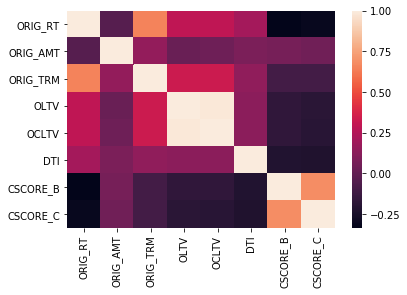

In [83]:
sns.heatmap(Acqn_2016Q4_cleaned_indexed_corr)
plt.show()

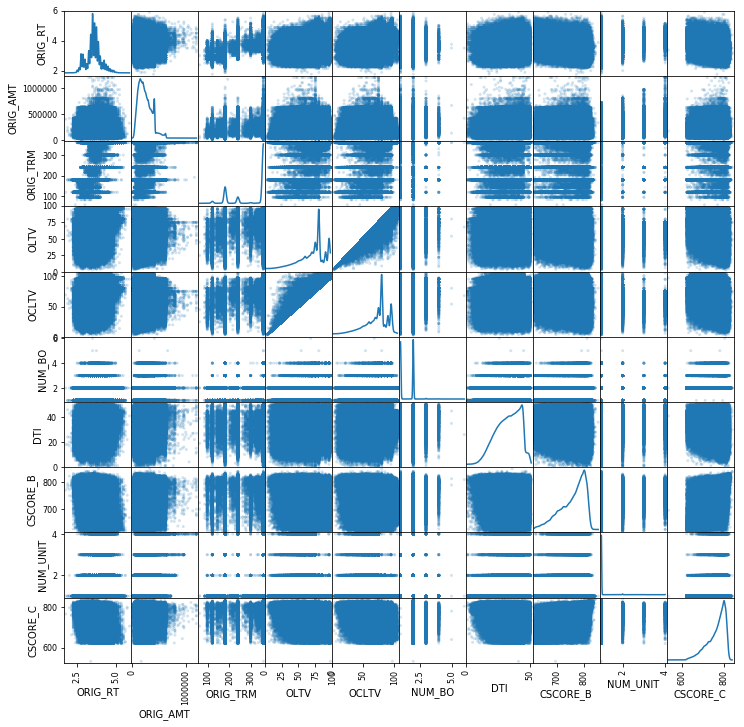

In [222]:
plt.figure()
pd.plotting.scatter_matrix(Acqn_2016Q4_cleaned_indexed,alpha=0.2, figsize=(12,12), diagonal='kde')
plt.show()

##Univariate Plots

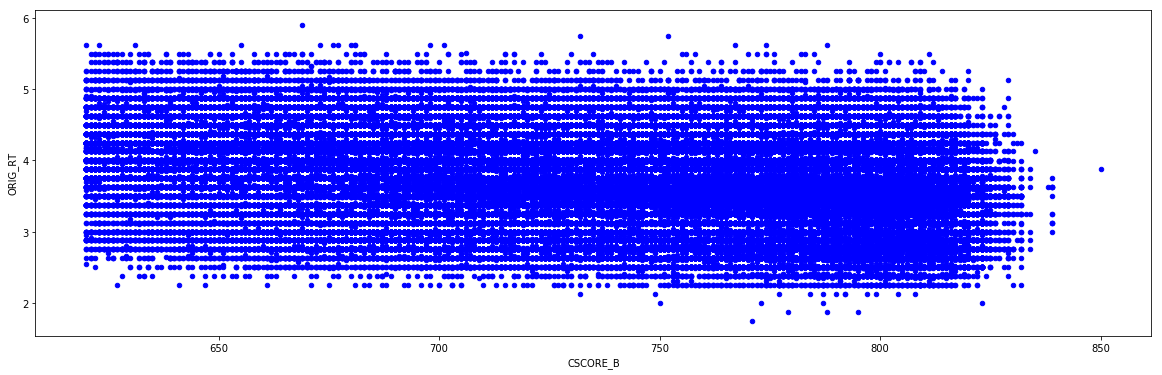

In [140]:
#Borrower Credit Score Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='CSCORE_B',y='ORIG_RT',color='Blue',figsize=(20,6))
plt.show()

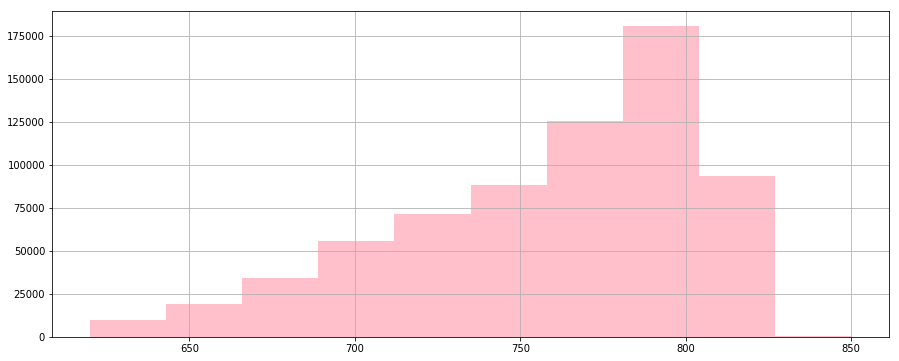

In [163]:
Acqn_2016Q4_cleaned_indexed.CSCORE_B.hist(bins=10,figsize=(15,6),color='Pink')
plt.show()

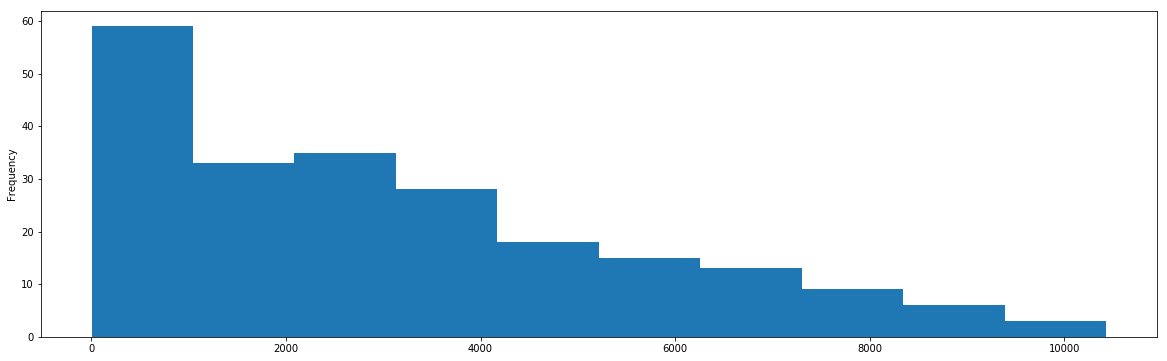

In [185]:
#Borrower Credit Score Distinct counts
Acqn_2016Q4_cleaned_indexed.CSCORE_B.value_counts().plot.hist(figsize=(20,6))
plt.show()

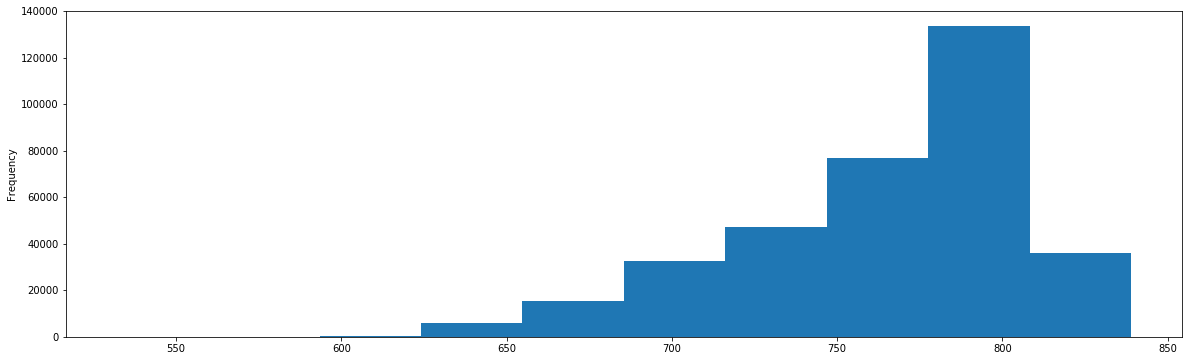

In [191]:
#Co-Borrower Credit Score histogram
Acqn_2016Q4_cleaned_indexed.CSCORE_C.plot.hist(figsize=(20,6))
plt.show()

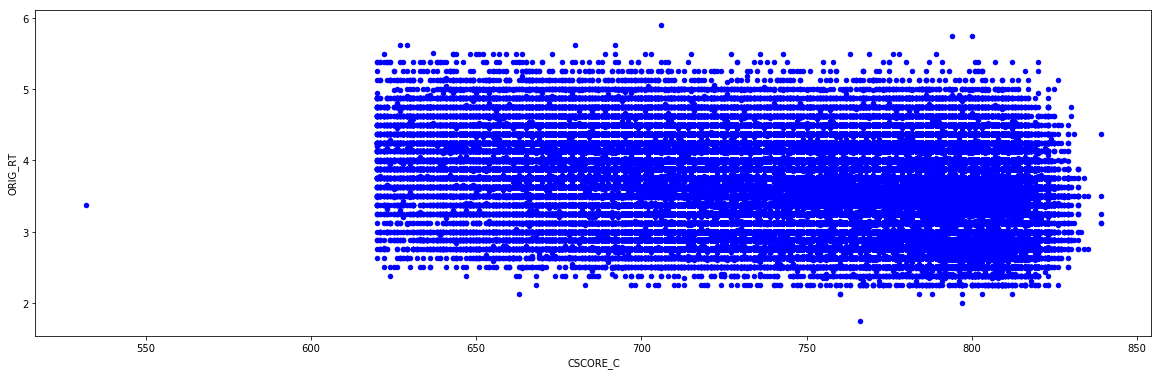

In [192]:
#Co-Borrower Credit Score Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='CSCORE_C',y='ORIG_RT',color='Blue',figsize=(20,6))
plt.show()

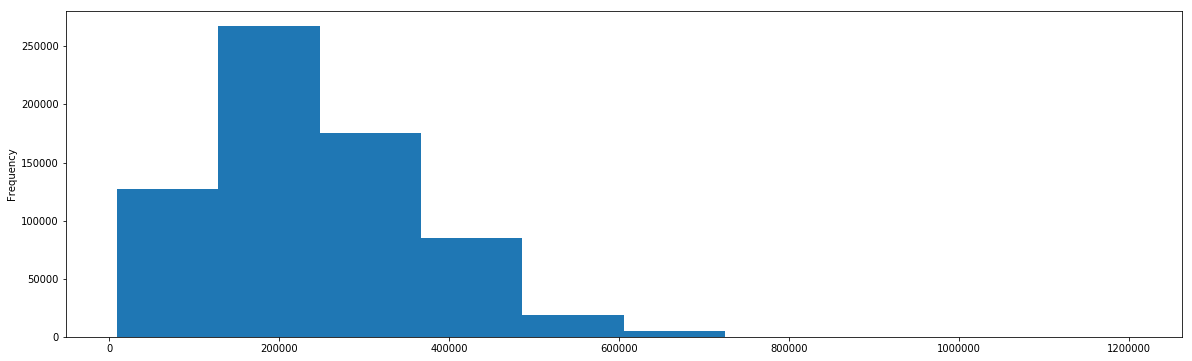

In [198]:
# Origination Amount Histogram
Acqn_2016Q4_cleaned_indexed.ORIG_AMT.plot.hist(figsize=(20,6))
plt.show()

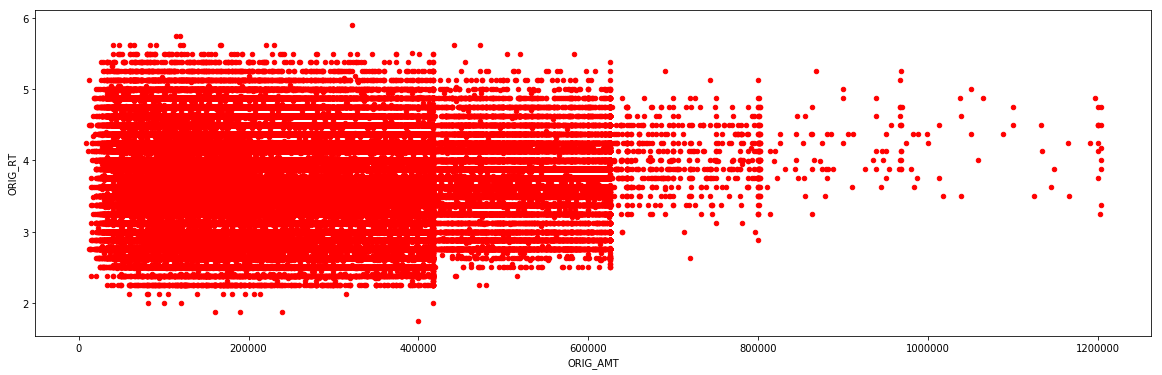

In [195]:
#Origination Amount Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='ORIG_AMT',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

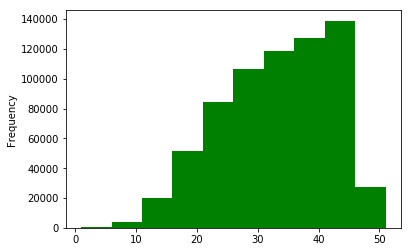

In [202]:
#Debt-to-Income_ratio_(DTI) histogram
Acqn_2016Q4_cleaned_indexed.DTI.plot.hist(color='Green')
plt.show()

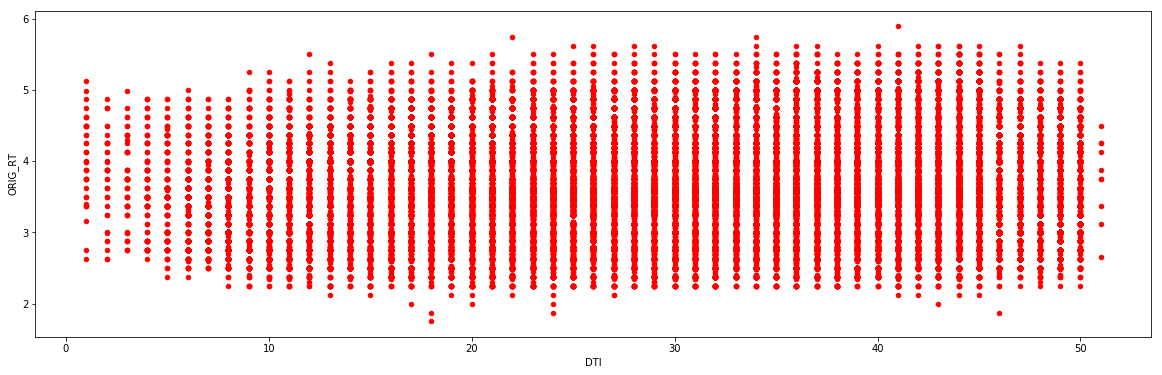

In [205]:
#Debt-to-Income_ratio_(DTI) Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='DTI',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

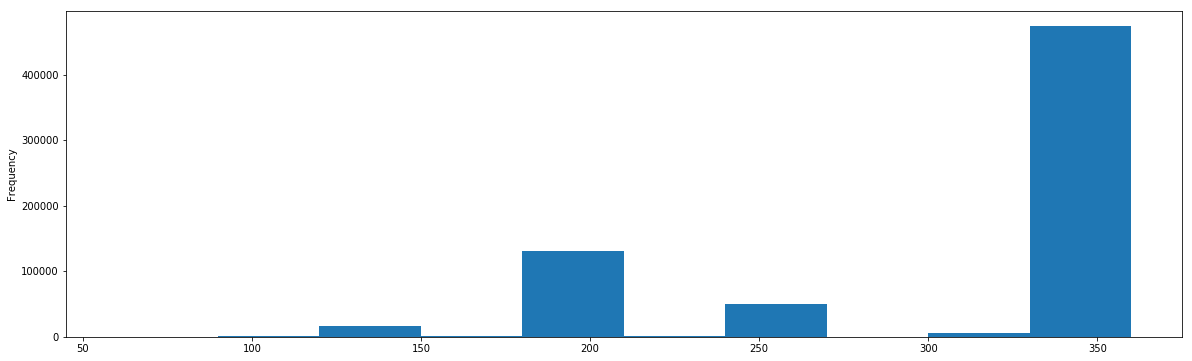

In [206]:
# Origination Term Histogram
Acqn_2016Q4_cleaned_indexed.ORIG_TRM.plot.hist(figsize=(20,6))
plt.show()

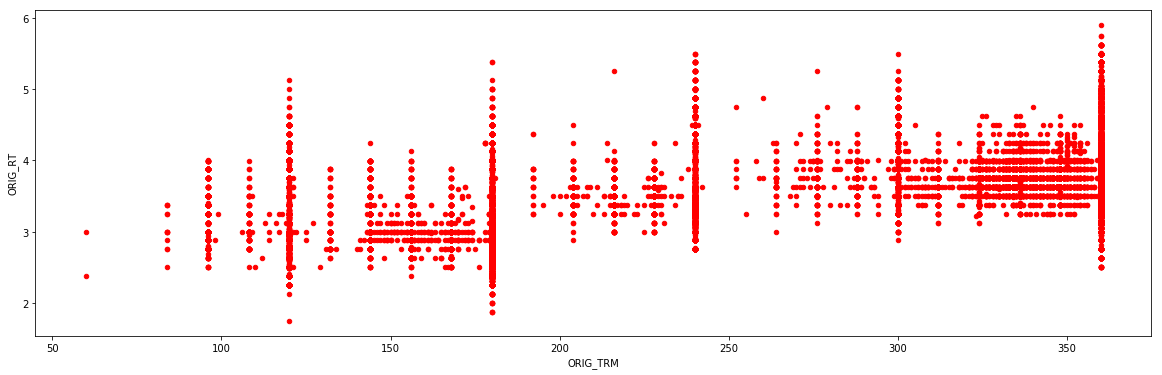

In [207]:
# Origination Term Vs Orgination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='ORIG_TRM',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

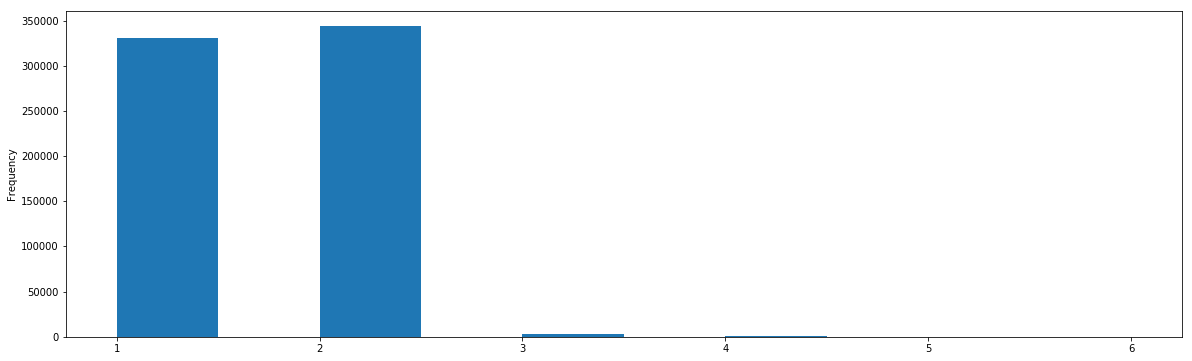

In [214]:
# Number of Borrowers
Acqn_2016Q4_cleaned_indexed.NUM_BO.plot.hist(figsize=(20,6))
plt.show()

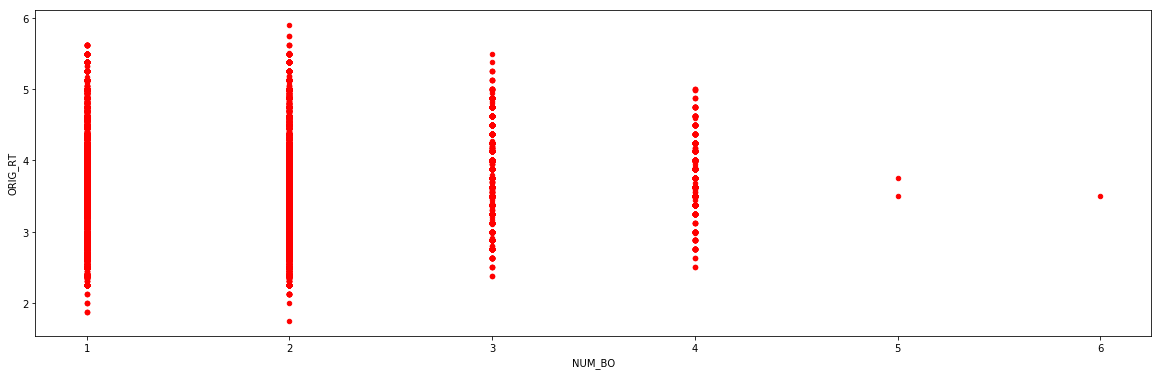

In [215]:
# Number of Borrowers Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='NUM_BO',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

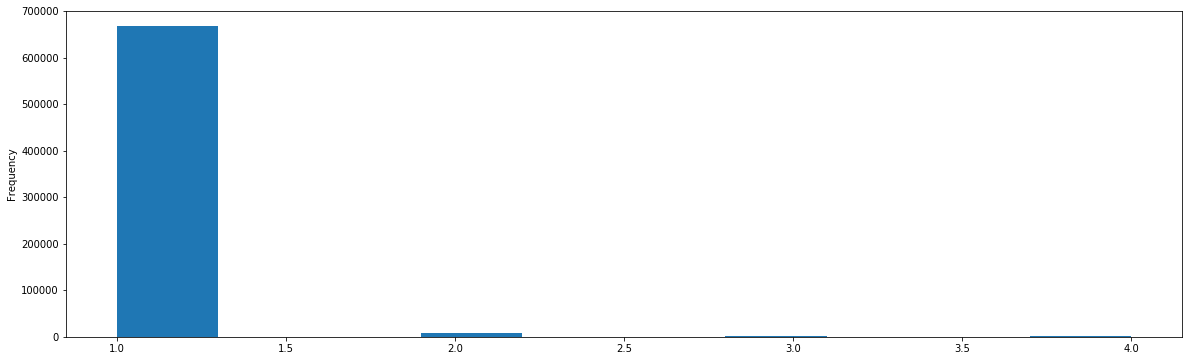

In [216]:
# Number of Units
Acqn_2016Q4_cleaned_indexed.NUM_UNIT.plot.hist(figsize=(20,6))
plt.show()

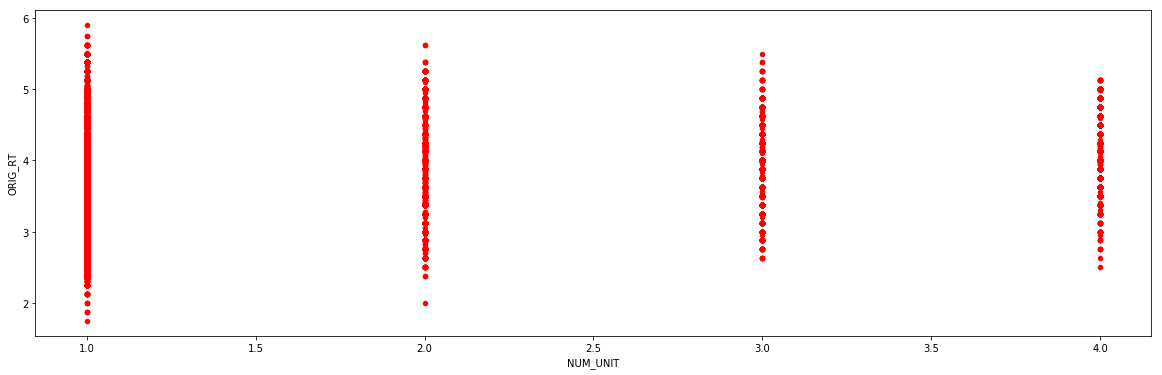

In [223]:
# Number of Units Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='NUM_UNIT',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

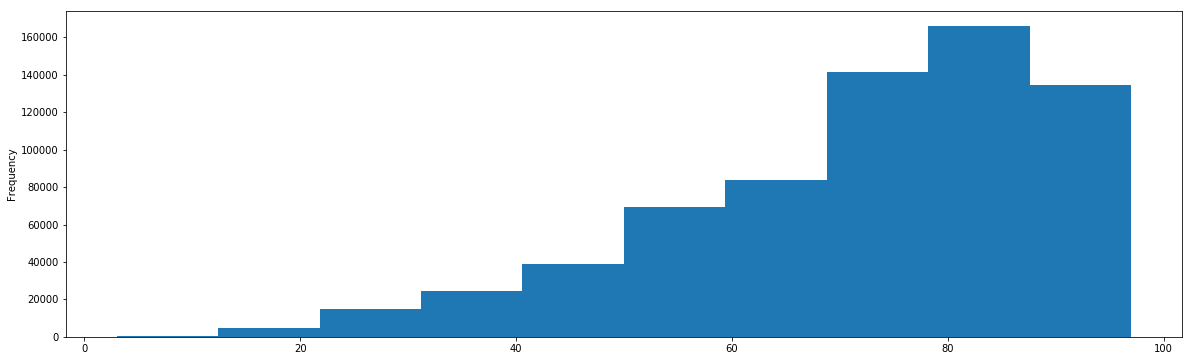

In [218]:
# Original_Loan-To-Value(LTV)
Acqn_2016Q4_cleaned_indexed.OLTV.plot.hist(figsize=(20,6))
plt.show()

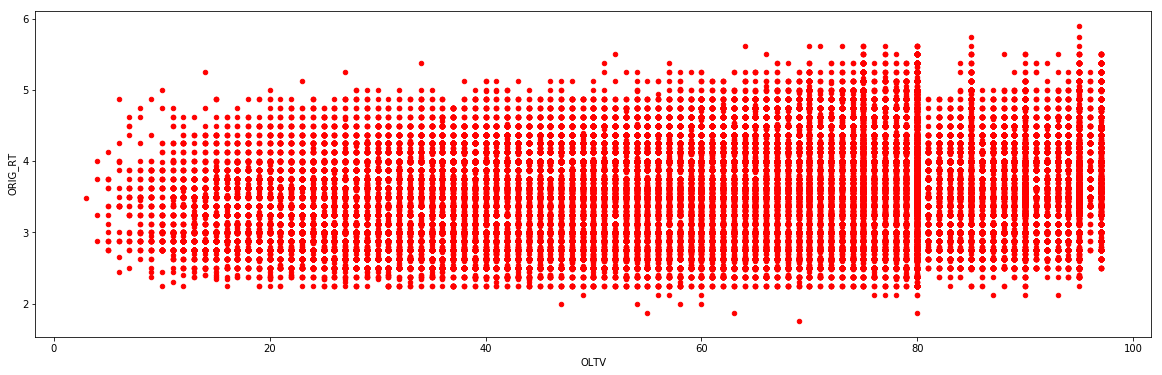

In [219]:
# Original_Loan-To-Value(LTV)Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='OLTV',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

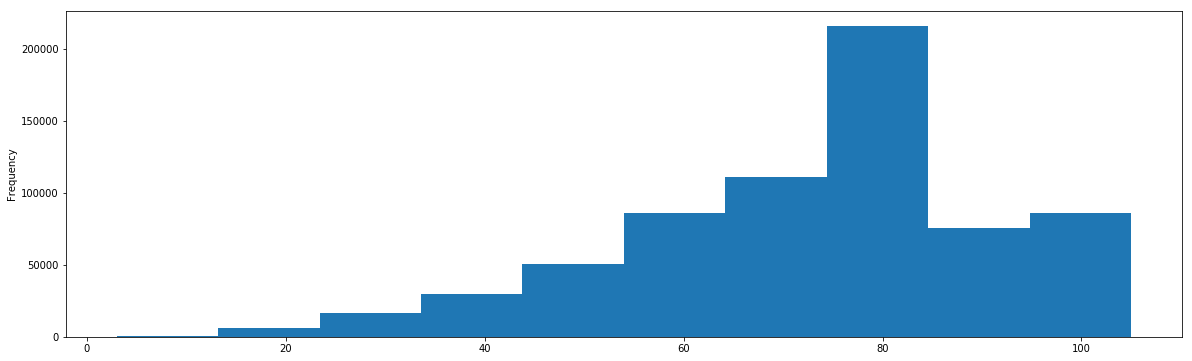

In [220]:
# Original_Combined_Loan-To-Value(LTV)
Acqn_2016Q4_cleaned_indexed.OCLTV.plot.hist(figsize=(20,6))
plt.show()

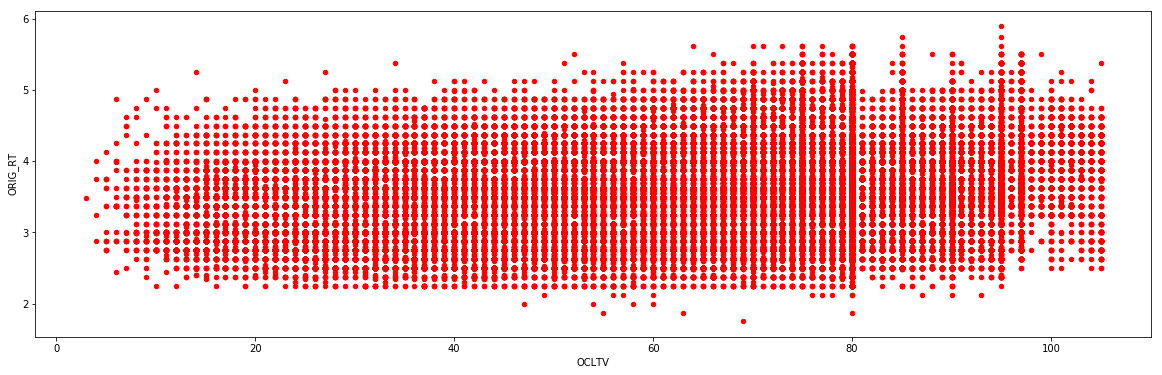

In [221]:
# Original_Combined_Loan-To-Value(LTV) Vs Origination Rate
Acqn_2016Q4_cleaned_indexed.plot.scatter(x='OCLTV',y='ORIG_RT',color='Red',figsize=(20,6))
plt.show()

In [181]:
Acqn_2016Q4_sliced=Acqn_2016Q4_cleaned_indexed[0:100000]

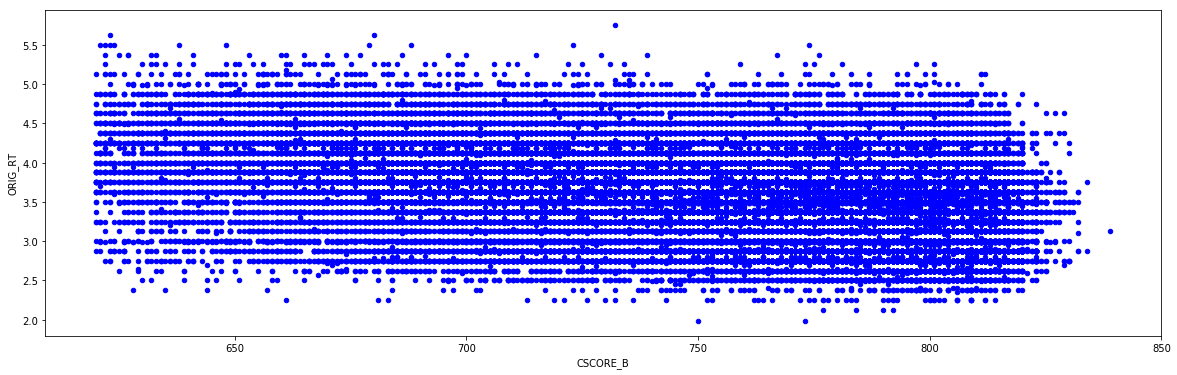

In [183]:
Acqn_2016Q4_sliced.plot.scatter(x='CSCORE_B',y='ORIG_RT',color='Blue',figsize=(20,6))
plt.show()

In [6]:
#Reading Multitple files Using custom function
PATH=r'C:\\Users\\habsa\\Documents\\DataAnalyticsDataSets\\SpringBoardProjects\\FannieMae Project Files\\Acqn_2009_2016'
Acqn_2009_2016=pd.DataFrame()
list=[]
files=glob.glob(os.path.join(PATH,"*.txt"))
for i in files:
    list.append(pd.read_csv(i,sep='|',header=None))
Acqn_2009_2016=pd.concat(list)